# Add Images' EDA

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pathlib import Path

%matplotlib inline


In [45]:

# json 파일을 불러옵니다. 
dpath = '/opt/ml/input/data/ICDAR17_Korean/ufo/'
fname = 'train.json'

with Path(dpath+fname).open(encoding='utf8') as handle:
    ann = json.load(handle)

dpath = '/opt/ml/input/data/dataset/'
fname = 'annotation.json'

with Path(dpath+fname).open(encoding='utf8') as handle:
    ann_add = json.load(handle)

### 새로운 json file은 format이 이전과 같을까?

In [49]:
ann_img = ann['images']
ann_img_key = ann_img["img_4380.jpg"].keys()
ann_add_img = ann_add['images']
ann_add_img_key = ann_add_img["14B9AA34-3F88-40E2-A3E8-6A2ED0CAE7E1.JPG"].keys()

print(f"base format : {ann_img_key}")
print(f"add format : {ann_add_img_key}")

base format : dict_keys(['img_h', 'img_w', 'words', 'tags', 'license_tag'])
add format : dict_keys(['paragraphs', 'words', 'chars', 'tags', 'relations', 'license_tag'])


In [62]:
# base format
print("Base format")
print(ann_img["img_4380.jpg"]["img_h"])
print(ann_img["img_4380.jpg"]["img_w"])
print(ann_img["img_4380.jpg"]["words"].keys())
print(ann_img["img_4380.jpg"]["tags"])
print(ann_img["img_4380.jpg"]["license_tag"])

Base format
2448
1836
dict_keys(['0', '1', '2'])
None
{'usability': True, 'public': True, 'commercial': True, 'type': 'CC-BY-SA', 'holder': None}


In [63]:
#add format
print("Add format")
print(ann_add_img["14B9AA34-3F88-40E2-A3E8-6A2ED0CAE7E1.JPG"]["paragraphs"])
print(ann_add_img["14B9AA34-3F88-40E2-A3E8-6A2ED0CAE7E1.JPG"]["words"].keys())
print(ann_add_img["14B9AA34-3F88-40E2-A3E8-6A2ED0CAE7E1.JPG"]["chars"])
print(ann_add_img["14B9AA34-3F88-40E2-A3E8-6A2ED0CAE7E1.JPG"]["tags"])
print(ann_add_img["14B9AA34-3F88-40E2-A3E8-6A2ED0CAE7E1.JPG"]["relations"])
print(ann_add_img["14B9AA34-3F88-40E2-A3E8-6A2ED0CAE7E1.JPG"]["license_tag"])


Add format
{}
dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46'])
{}
{}
{}
{'usability': True, 'public': False, 'commercial': True, 'type': None, 'holder': 'Upstage'}


In [57]:
print('Base format')
print(ann_img["img_4380.jpg"]["words"]['0'].keys())
print('Add format')
print(ann_add_img["14B9AA34-3F88-40E2-A3E8-6A2ED0CAE7E1.JPG"]["words"]['0'].keys())

Base format
dict_keys(['points', 'transcription', 'language', 'illegibility', 'orientation', 'word_tags'])
Add format
dict_keys(['points', 'orientation', 'transcription', 'word_tags', 'language', 'illegibility'])


### 이미지 그려주기

In [59]:
# json 파일을 list 이름들을 불러옵니다. 그리고 뒤죽박죽인 이름들을 정렬해줍니다.
lann = list(ann['images'])
sort_lann = sorted(lann)

In [60]:
# 리스트에 이미지별로 points, 전사, orientation 담기
lpoints = []
ltranscript = []
lhv = []
for i in range(len(sort_lann)):
    temp_lp = []
    temp_lt = []
    temp_lhv = []
    for j in range(len(ann['images'][sort_lann[i]]['words'])):
        temp_lp.append(ann['images'][sort_lann[i]]['words'][str(j)]['points'])
        temp_lt.append(ann['images'][sort_lann[i]]['words'][str(j)]['transcription'])
        temp_lhv.append(ann['images'][sort_lann[i]]['words'][str(j)]['orientation'])
        temp_lp = np.array(temp_lp).astype('int32').tolist()
    lpoints.append(temp_lp)
    ltranscript.append(temp_lt)
    lhv.append(temp_lhv)

In [8]:
img_path = '/opt/ml/input/data/ICDAR17_Korean/images/'

In [10]:
# num : 뽑을 이미지 갯수, start : 시작할 위치
def visual_img(num, start):
    fig, ax = plt.subplots(nrows=num, ncols=2, figsize=(10, 4*num), constrained_layout=True)
    for i in range(num):
        img = cv2.imread(img_path+sort_lann[i+start])
        oimg = cv2.imread(img_path+sort_lann[i+start])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        oimg = cv2.cvtColor(oimg,cv2.COLOR_BGR2RGB)
        
        for j in range(len(lpoints[i+start])):
            img = cv2.polylines(img,np.array([lpoints[i+start][j]],dtype=np.int32),True,(0,255,0),10)
        
        ax[i][0].imshow(img)
        ax[i][1].imshow(oimg)

    plt.show()
        

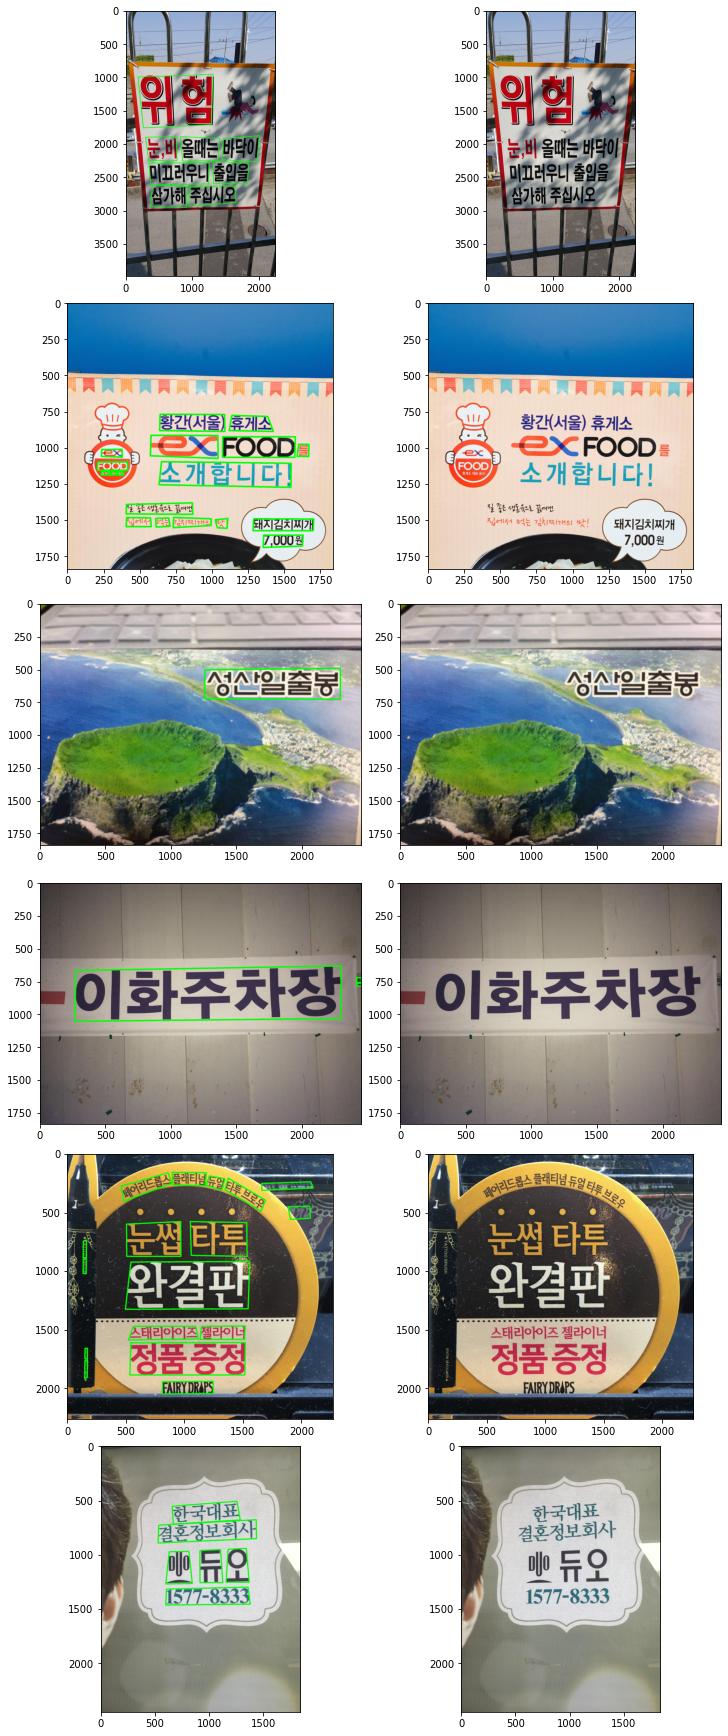

In [12]:
visual_img(6, 450)

In [ ]:
# json 파일을 list 이름들을 불러옵니다. 그리고 뒤죽박죽인 이름들을 정렬해줍니다.
lann = list(ann['images'])
sort_lann = sorted(lann)

In [ ]:
# 리스트에 이미지별로 points, 전사, orientation 담기
lpoints = []
ltranscript = []
lhv = []
for i in range(len(sort_lann)):
    temp_lp = []
    temp_lt = []
    temp_lhv = []
    for j in range(len(ann['images'][sort_lann[i]]['words'])):
        temp_lp.append(ann['images'][sort_lann[i]]['words'][str(j)]['points'])
        temp_lt.append(ann['images'][sort_lann[i]]['words'][str(j)]['transcription'])
        temp_lhv.append(ann['images'][sort_lann[i]]['words'][str(j)]['orientation'])
        temp_lp = np.array(temp_lp).astype('int32').tolist()
    lpoints.append(temp_lp)
    ltranscript.append(temp_lt)
    lhv.append(temp_lhv)

In [ ]:
img_path = '/opt/ml/input/data/ICDAR17_Korean/images/'

In [ ]:
# num : 뽑을 이미지 갯수, start : 시작할 위치
def visual_img(num, start):
    fig, ax = plt.subplots(nrows=num, ncols=2, figsize=(10, 4*num), constrained_layout=True)
    for i in range(num):
        img = cv2.imread(img_path+sort_lann[i+start])
        oimg = cv2.imread(img_path+sort_lann[i+start])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        oimg = cv2.cvtColor(oimg,cv2.COLOR_BGR2RGB)
        
        for j in range(len(lpoints[i+start])):
            img = cv2.polylines(img,np.array([lpoints[i+start][j]],dtype=np.int32),True,(0,255,0),10)
        
        ax[i][0].imshow(img)
        ax[i][1].imshow(oimg)

    plt.show()
        

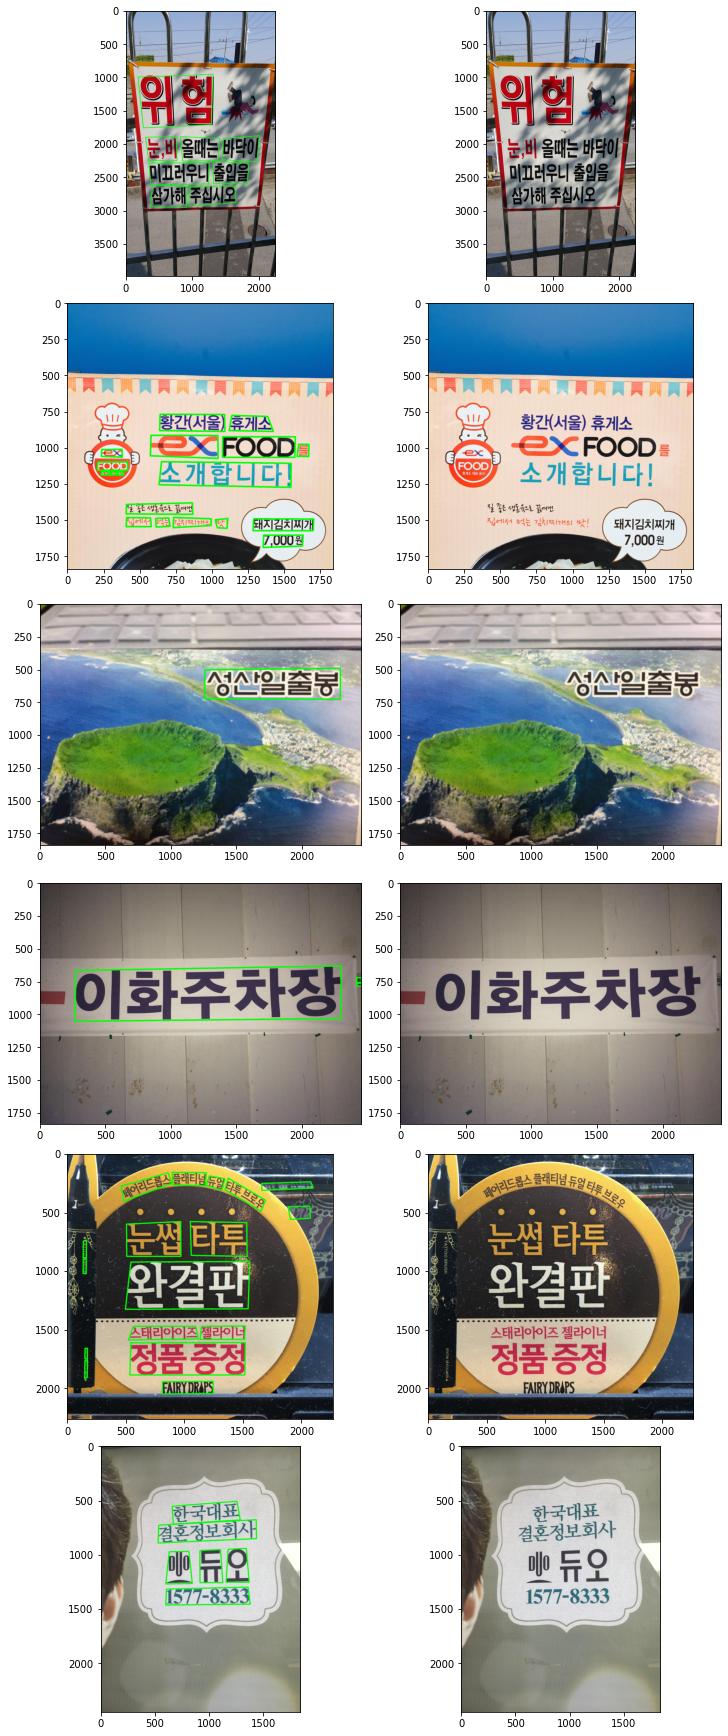

In [ ]:
visual_img(6, 450)